# WORD SEGMENTATION

## import library

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, measure

## detect_letters

In [3]:
def detect_letters(image_path):
    image = io.imread(image_path) # Baca gambar menggunakan scikit-image
    gray = color.rgb2gray(image) # Ubah gambar ke skala keabuan
    threshold = gray < 0.5 # Lakukan thresholding untuk mengubah gambar ke binary
    clean_image = measure.label(threshold)  # Terapkan operasi morfologi untuk membersihkan gambar
    contours = measure.find_contours(clean_image, 0.5) # Temukan kontur huruf
 
    detected_letters = []    # Deteksi huruf berdasarkan area dan aspek rasio
    for contour in contours:
        y, x = contour[:, 0], contour[:, 1]
        ymin, ymax = int(min(x)), int(max(x))
        xmin, xmax = int(min(y)), int(max(y))
        width = xmax - xmin
        height = ymax - ymin
        area = width * height
        aspect_ratio = width / height
        if area > 50 and aspect_ratio > 0.2:
            detected_letters.append((xmin, ymin, width, height))
    
    return detected_letters

## Path file gambar

In [4]:
image_path = 'lauren.jpg'

## Buka gambar menggunakan scikit-image

In [5]:
image = io.imread(image_path)

# Read And Resize Image

In [8]:
image = cv2.imread("lauren.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, channel = image.shape

print(f"Height: {height}")
print(f"Width: {width}")
print(f"Channel: {channel}")

Height: 826
Width: 1280
Channel: 3


# tampilan size gambar

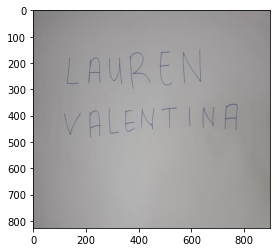

In [9]:
def resize_image(image):
    height, width, channel = image.shape
    if width > 1000:
        width = 900
        factor = width / height
        new_height = int(width / factor)

    image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
    return image
image = resize_image(image)

## memproses gambar

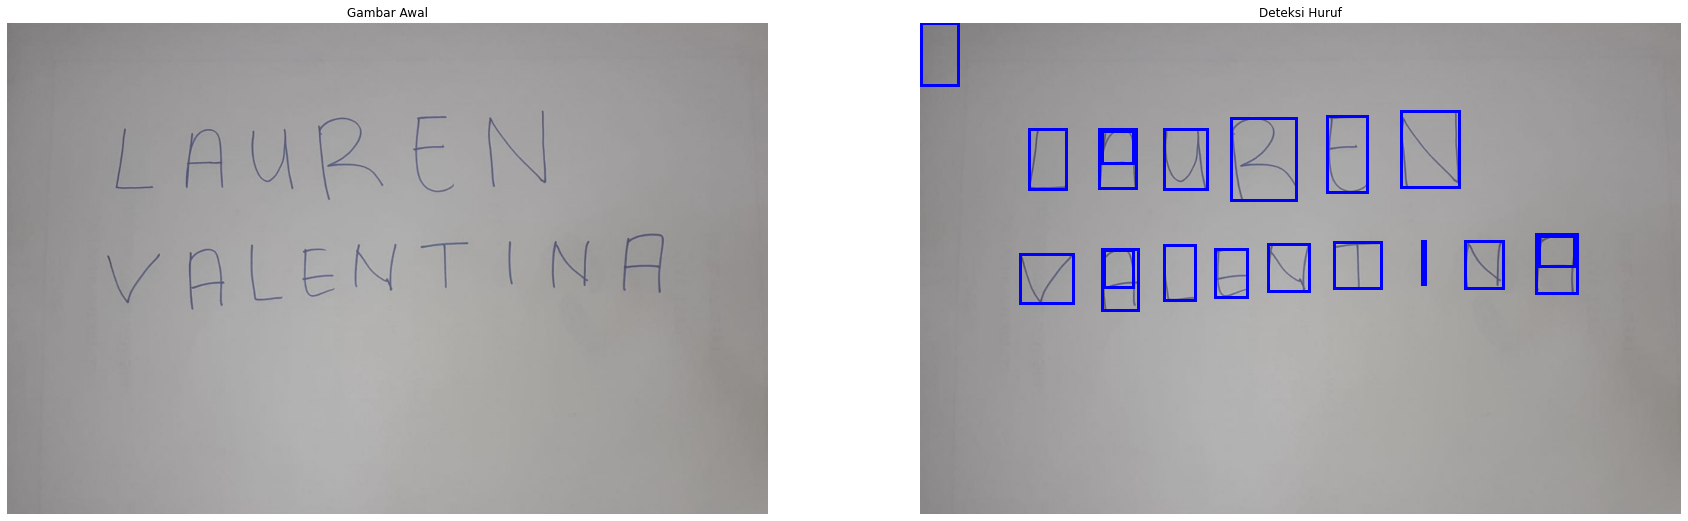

In [7]:
# Buat figure dengan ukuran yang lebih besar
plt.figure(figsize=(30, 20))

# Tampilkan gambar awal
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Gambar Awal')

# Panggil fungsi deteksi huruf
detected_letters = detect_letters(image_path)

# Tampilkan gambar dengan persegi panjang yang mengelilingi huruf yang terdeteksi
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
plt.title('Deteksi Huruf')

# Tampilkan persegi panjang yang mengelilingi huruf yang terdeteksi
for (x, y, width, height) in detected_letters:
    rect = plt.Rectangle((y, x), height, width, edgecolor='b', linewidth=3, fill=False)
    plt.gca().add_patch(rect)

# Tampilkan gambar yang telah dideteksi hurufnya
plt.show()

## selesai